# Making a Movie

Matplotlib has a very nice animator feature that lets you visualize time-dependent data as a movie. The animator function <code>FuncAnimation</code> needs as input a matplotlib figure object and an update function that returns things to plot for each frame. In this case it is a matplotlib line object. 

To save a movie in .mp4 format we need to install an additional package with conda: Open the command promt (Windows users: use the Anaconda navigator to open powershell) and activate your conda environment: <pre>conda activate</pre> 
and install 'ffmpeg'
<pre>conda install ffmpeg</pre> 


In [8]:
from matplotlib.animation import FuncAnimation
from numpy.random import random
from IPython.display import HTML
from numpy import *

TypeError: 'module' object is not callable

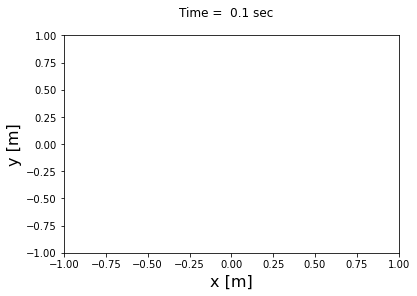

In [9]:
mf = 16 # font size

# create an empty figure object and add a subplot
fig = plt.figure() # smaller is faster
ax = fig.add_subplot()
 
# set some boundaries
xmin = -1
xmax = 1
ymin = -1
ymax = 1

# start with no data as we will generate it later
xdata, ydata = [], []

# create an empty line object 
# we just update the x and y data of the line
# and do not create the line from scratch in each frame
line, = ax.plot(xdata, ydata, 'r-')


# this function is called ones in the begining
# it can be used to set a number of things for the frames.
# each frame is just a regular plot from matplotlib,
# the plots are then put together into a movie
def initFrame():
    # axis
    ax.set_xlabel(r'x [m]', fontsize=mf)
    ax.set_ylabel(r'y [m]', fontsize=mf)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    
    return line, # return a sequence (extra komma) 
    
    

# we need a function that calculates the next frame
# it gets as argument the frame number and any number of 
# additional arguments one needs. See call to FuncAnimation
def updateFrame(nframe,xdata,ydata):
    
    
    if nframe == 0:
        # in the first frame we just set the first point in the middle
        xdata.append((xmin+xmax)/2) # start in the middle of the plot
        ydata.append((ymin+ymax)/2)
        line.set_data(xdata, ydata)
        return line, # need to be a sequence, here tuple
    
    
    deltaT = 0.1 # 100 ms
    deltaR = 0.1 
    
    # we may want to give the current time in the title
    itime = nframe*deltaT 
    plt.suptitle("Time = " + '{:4.1f}'.format(itime)+' sec')
        
    # we just do a random walk and plot the trajectory of
    # the walker. The step width is deltaT and the 
    # direction is random 
    
    phi = random()*pi*2 # random number in [0,2PI)
    
    dx = cos(phi)*deltaR
    dy = sin(phi)*deltaR
    
    newx = xdata[-1] + dx
    newy = ydata[-1] + dy
 
    # bounce on walls of figure:
    if newx > xmax or newx < xmin: newx -= 2*dx
    if newy > ymax or newy < ymin: newy -= 2*dy 
    
    # append new data to end of list
    xdata.append(newx)
    ydata.append(newy)
    
    # delete data on the tail 
    if len(xdata) > 100:
        xdata.pop(0) # removes zero'th element
        ydata.pop(0)
        
    line.set_data(xdata, ydata)
    return line,  # return a sequence (extra comma) 

animation = FuncAnimation(fig, init_func=initFrame, frames=251, 
                        interval=100, repeat=False,blit=True,
                        func=updateFrame, fargs=tuple([xdata,ydata]))  
# ------------------------------------------------------^ additional arguments of updateFrame

# blit: fast graphics operations: only re-draw changed parts of the frame 

# we can save to file
# (this will take a a few seconds to render)
#animation.save('random_walker.mp4', fps=10, dpi=150, writer='ffmpeg')

# or embed the animation into the notebook
# (this will take a a few seconds to render)
#HTML(animation.to_html5_video())

# and even add control elements using Javascript widgets 
# (this will take a a few seconds to render)
HTML(animation.to_jshtml())

# Task 3

Animate the function $f(x,t) = \cos(x+\omega t)$ for $\omega = 1$ in the intervals $x,t \in [0,2\pi]$. 

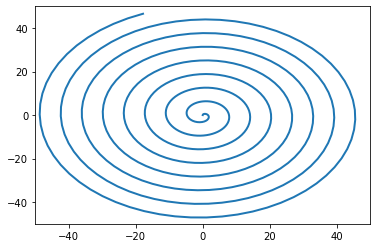

In [6]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
 

#creating a blank window for the animation
fig = plt.figure()
axis = plt.axes(xlim =(-50, 50),
                ylim =(-50, 50))
 
line, = axis.plot([], [], lw = 2)
 
# what will our line dataset
# contain?
def init():
    line.set_data([], [])
    return line,
 
# initializing empty values
# for x and y co-ordinates
xdata, ydata = [], []
 
# animation function
def animate(i):
    # t is a parameter which varies
    # with the frame number
    t = 0.1 * i
     
    # x, y values to be plotted
    x = t * np.sin(t)
    y = t * np.cos(t)
     
    # appending values to the previously
    # empty x and y data holders
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
     
    return line,
 
# calling the animation function    
anim = animation.FuncAnimation(fig, animate,
                            init_func = init,
                            frames = 500,
                            interval = 20,
                            blit = True)

anim.save('myfunc.mp4', writer = 'ffmpeg', fps = 30)

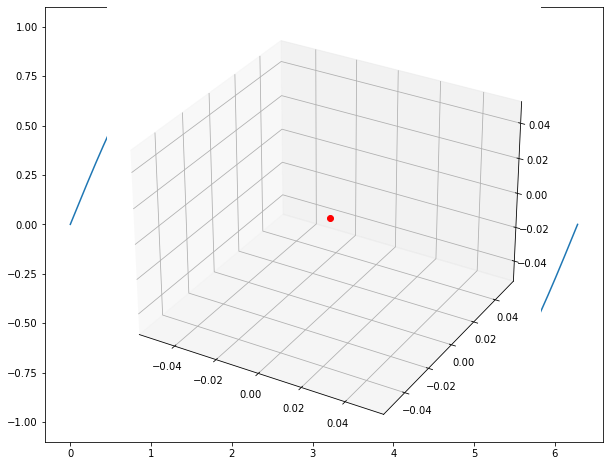

In [3]:
TWOPI = 2*np.pi

fig = plt.figure(figsize=(10,8))


t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

#ax = plt.axis([0,TWOPI,-1,1])
ax = plt.axes(projection='3d')

redDot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

# create animation using the animate() function
myAnimation = FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), \
                                      interval=10, blit=True, repeat=True)

f(x,t) = cos(x + $\omega$t)

In [12]:
from numpy import *
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from numpy.random import random
from IPython.display import HTML 

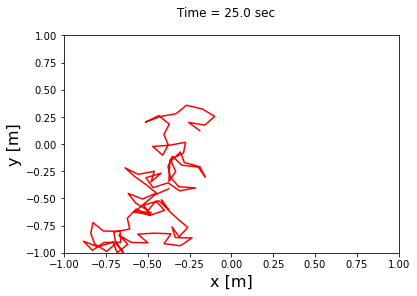

In [13]:
mf = 16 # font size

# create an empty figure object and add a subplot
fig = plt.figure() # smaller is faster
ax = fig.add_subplot()

# set some boundaries
xmin = -1
xmax = 1
ymin = -1
ymax = 1

# start with no data as we will generate it later
xdata, ydata = [], []

# create an empty line object 
# we just update the x and y data of the line
# and do not create the line from scratch in each frame
line, = ax.plot(xdata, ydata, 'r-')


# this function is called ones in the begining
# it can be used to set a number of things for the frames.
# each frame is just a regular plot from matplotlib,
# the plots are then put together into a movie
def initFrame():
    # axis
    ax.set_xlabel(r'x [m]', fontsize=mf)
    ax.set_ylabel(r'y [m]', fontsize=mf)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    
    return line, # return a sequence (extra komma) 
    
    

# we need a function that calculates the next frame
# it gets as argument the frame number and any number of 
# additional arguments one needs. See call to FuncAnimation
def updateFrame(nframe,xdata,ydata):
    
    
    if nframe == 0:
        # in the first frame we just set the first point in the middle
        xdata.append((xmin+xmax)/2) # start in the middle of the plot
        ydata.append((ymin+ymax)/2)
        line.set_data(xdata, ydata)
        return line, # need to be a sequence, here tuple
    
    
    deltaT = 0.1 # 100 ms
    deltaR = 0.1 
    
    # we may want to give the current time in the title
    itime = nframe*deltaT 
    plt.suptitle("Time = " + '{:4.1f}'.format(itime)+' sec')
        
    # we just do a random walk and plot the trajectory of
    # the walker. The step width is deltaT and the 
    # direction is random 
    
    phi = random()*pi*2 # random number in [0,2PI)
    
    dx = cos(phi)*deltaR
    dy = sin(phi)*deltaR
    
    newx = xdata[-1] + dx
    newy = ydata[-1] + dy
 
    # bounce on walls of figure:
    if newx > xmax or newx < xmin: newx -= 2*dx
    if newy > ymax or newy < ymin: newy -= 2*dy 
    
    # append new data to end of list
    xdata.append(newx)
    ydata.append(newy)
    
    # delete data on the tail 
    if len(xdata) > 100:
        xdata.pop(0) # removes zero'th element
        ydata.pop(0)
        
    line.set_data(xdata, ydata)
    return line,  # return a sequence (extra comma) 
    
   
# note: we can use line breaks in function calls
animation = FuncAnimation(fig, init_func=initFrame, frames=251, 
                        interval=100, repeat=False,blit=True,
                        func=updateFrame, fargs=tuple([xdata,ydata]))  
# ------------------------------------------------------^ additional arguments of updateFrame

# blit: fast graphics operations: only re-draw changed parts of the frame 

# we can save to file
# (this will take a a few seconds to render)
#animation.save('random_walker.mp4', fps=10, dpi=150, writer='ffmpeg')

# or embed the animation into the notebook
# (this will take a a few seconds to render)
#HTML(animation.to_html5_video())

# and even add control elements using Javascript widgets 
# (this will take a a few seconds to render)
HTML(animation.to_jshtml())